In [175]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import string
import math
import random as python_random
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.preprocessing.text import Tokenizer
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, LSTM, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras import backend as K
import tensorflow as tf
from keras.layers import Conv1D,GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

np.random.seed(123) 
python_random.seed(123)
tf.random.set_seed(1234)

import lightgbm as lgb

In [176]:
products_data = pd.read_csv('Dataset/Intermediate/all_products.csv')
products_data.head()

,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount
0,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Collections,"With ""I DO"" emblazoned on this Hanky Panky lac...",panties,40.0,40.0,0.0
1,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Panties,"With ""I DO"" emblazoned on this Hanky Panky lac...",panties,40.0,40.0,0.0
2,'After Midnight' Lace Open Gusset G-String,hanky panky,Bridal Lingerie,Stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0
3,'After Midnight' Lace Open Gusset G-String,hanky panky,Sexy Lingerie,Stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0
4,'After Midnight' Lace Open Gusset G-String,hanky panky,Women's Panties,Stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0


In [177]:
products_data['description'] = products_data['description'].str.lower()
products_data.head()

,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount
0,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Collections,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0
1,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Panties,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0
2,'After Midnight' Lace Open Gusset G-String,hanky panky,Bridal Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0
3,'After Midnight' Lace Open Gusset G-String,hanky panky,Sexy Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0
4,'After Midnight' Lace Open Gusset G-String,hanky panky,Women's Panties,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0


In [178]:
# Stopwords removal
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves"]

In [179]:
def remove_stopwords(data):
  data['clean_description'] = data['description'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

data_cleaned = remove_stopwords(products_data)
data_cleaned['clean_description'] = data_cleaned['clean_description'].str.replace('[{}]'.format(string.punctuation), ' ')
data_cleaned.head()

,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description
0,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Collections,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0,i do emblazoned hanky panky lace hipster swa...
1,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Panties,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0,i do emblazoned hanky panky lace hipster swa...
2,'After Midnight' Lace Open Gusset G-String,hanky panky,Bridal Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...
3,'After Midnight' Lace Open Gusset G-String,hanky panky,Sexy Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...
4,'After Midnight' Lace Open Gusset G-String,hanky panky,Women's Panties,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...


In [180]:
# Tokenizing
raw_text = np.hstack([data_cleaned.clean_description.str.lower()])
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)
data_cleaned["seq_description"] = tok_raw.texts_to_sequences(data_cleaned.clean_description.str.lower())
max_seq_description = np.max(data_cleaned.seq_description.apply(lambda x: len(x)))
MAX_TEXT = np.max(data_cleaned.seq_description.apply(lambda x : max(x))) + 3
data_cleaned.head()

,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description,seq_description
0,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Collections,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0,i do emblazoned hanky panky lace hipster swa...,"[578, 579, 1489, 73, 75, 2, 197, 952, 442, 254..."
1,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Panties,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0,i do emblazoned hanky panky lace hipster swa...,"[578, 579, 1489, 73, 75, 2, 197, 952, 442, 254..."
2,'After Midnight' Lace Open Gusset G-String,hanky panky,Bridal Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...,"[32, 108, 2, 983, 580, 510, 117, 830, 499, 105..."
3,'After Midnight' Lace Open Gusset G-String,hanky panky,Sexy Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...,"[32, 108, 2, 983, 580, 510, 117, 830, 499, 105..."
4,'After Midnight' Lace Open Gusset G-String,hanky panky,Women's Panties,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...,"[32, 108, 2, 983, 580, 510, 117, 830, 499, 105..."


In [181]:
words_to_index = tokenizer.word_index

def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)
  return word_to_vec_map

word_to_vec_map = read_glove_vector('Dataset/glove.6B/glove.6B.50d.txt')
maxLen = 150
vocab_len = len(words_to_index) + 1
embed_vector_len = word_to_vec_map['moon'].shape[0]
emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

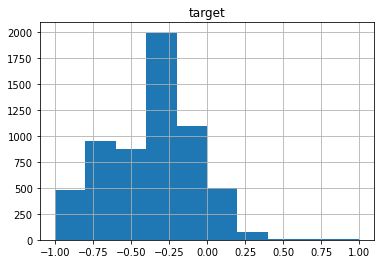

In [182]:
# Min Max Scaler for target
data_cleaned["target"] = np.log(data_cleaned.mrp+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
data_cleaned["target"] = target_scaler.fit_transform(data_cleaned.target.values.reshape(-1,1))
pd.DataFrame(data_cleaned.target).hist()

In [183]:
# Train Test Split
dtrain, dtest = train_test_split(data_cleaned, random_state=123, train_size=0.80)
print(dtrain.shape)
print(dtest.shape)
dtrain.head()

(4785, 11)
(1197, 11)


,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description,seq_description,target
4345,Rolled Fiery Floral Low Rise Thong,hanky panky,Thongs,red hot!,panties,25.00,25.000000,0.00,red hot,"[535, 433]",-0.413854
2544,Contrast Lace Triangle Bra,us topshop,Lingerie,non-padded triangle bra with non-wired cups fo...,bras,38.00,38.000000,0.00,non padded triangle bra non wired cups barely ...,"[450, 174, 157, 11, 450, 1042, 55, 802, 519, 3...",-0.232735
428,Aerie Boho Plunge Bralette,aerie,Plunge,"peace, love & lace. bralettes. we did them fir...",bralettes,26.95,17.066667,36.67,peace love lace bralettes first best la...,"[164, 28, 2, 137, 77, 97, 45, 79, 77, 70, 79, ...",-0.381549
1818,Amazing Assets Push-Up Bra 858220,b.tempt'd,Women - Lingerie & Shapewear - Designer Lingerie,highlight your figure in the most flattering w...,bras,68.00,38.592857,43.25,highlight figure flattering way amazing asset...,"[2053, 317, 219, 152, 900, 1269, 193, 210, 11,...",0.022124
2606,Cross-Dyed Lace Brazilian Bikini 592104,hanky panky,Women - Lingerie & Shapewear - Designer Lingerie,discover the soft feel of sheer lace in an ele...,other,32.00,32.000000,0.00,discover soft feel sheer lace elegant rose des...,"[791, 14, 129, 87, 2, 441, 358, 143, 308, 268,...",-0.307357


In [184]:
# Sequence Padding
def get_keras_data(dataset):
    X = {
        'item_desc': pad_sequences(dataset.seq_description, maxlen=75)
    }
    return X

X_train = get_keras_data(dtrain)
X_test = get_keras_data(dtest)
X_train

{'item_desc': array([[   0,    0,    0, ...,    0,  535,  433],
        [   0,    0,    0, ...,    9,   16,    4],
        [   0,    0,    0, ...,    1,    1,    7],
        ...,
        [   0,    0,    0, ...,    1,    1,    7],
        [   0,    0,    0, ...,   53,   63,   50],
        [   0,    0,    0, ...,   54, 1541,  210]])}

## GRU Based Model

In [185]:
# Model Training
def rmsle_cust(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))

def get_gru_model():
    # Params
    dr_r = 0.1
    
    # Inputs
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")
    
    # Embeddings Layers
    emb_item_desc = Embedding(MAX_TEXT, 50)(item_desc)
#     emb_item_desc = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=True)(item_desc)
    
    # RNN Layer
    rnn_layer1 = GRU(16) (emb_item_desc)
    
    # Main Layer
    main_l = concatenate([
        rnn_layer1
    ])
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    # Output Layer
    output = Dense(1, activation="linear") (main_l)
    
    # Init Model
    model = Model([item_desc], output)
    model.compile(loss="mse", optimizer="adam", metrics=["mae", rmsle_cust])
    
    return model

    
gru_model = get_gru_model()

# Calculation of Loss History
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history = LossHistory()
gru_model.summary()

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 item_desc (InputLayer)      [(None, 75)]              0         
                                                                 
 embedding_40 (Embedding)    (None, 75, 50)            166250    
                                                                 
 gru_15 (GRU)                (None, 16)                3264      
                                                                 
 concatenate_51 (Concatenate  (None, 16)               0         
 )                                                               
                                                                 
 dense_129 (Dense)           (None, 128)               2176      
                                                                 
 dropout_54 (Dropout)        (None, 128)               0         
                                                          

In [186]:
# Model Fitting

BATCH_SIZE = 20000
epochs = 5
gru_model = get_gru_model()
gru_model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_test, dtest.target)
          , verbose=1, callbacks=[history])

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.2040 - mae: 0.3774 - rmsle_cust: 0.0136 - val_loss: 0.1722 - val_mae: 0.3431 - val_rmsle_cust: 0.0094
Epoch 2/5
1/1 [==============================] - 1s 558ms/step - loss: 0.1780 - mae: 0.3476 - rmsle_cust: 0.0097 - val_loss: 0.1486 - val_mae: 0.3136 - val_rmsle_cust: 0.0094
Epoch 3/5
1/1 [==============================] - 1s 534ms/step - loss: 0.1541 - mae: 0.3185 - rmsle_cust: 0.0097 - val_loss: 0.1263 - val_mae: 0.2840 - val_rmsle_cust: 0.0094
Epoch 4/5
1/1 [==============================] - 1s 545ms/step - loss: 0.1316 - mae: 0.2894 - rmsle_cust: 0.0097 - val_loss: 0.1055 - val_mae: 0.2557 - val_rmsle_cust: 0.0094
Epoch 5/5
1/1 [==============================] - 1s 535ms/step - loss: 0.1101 - mae: 0.2609 - rmsle_cust: 0.0097 - val_loss: 0.0870 - val_mae: 0.2299 - val_rmsle_cust: 0.0094


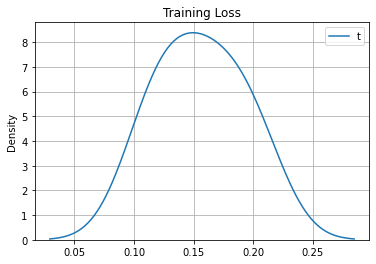

In [187]:
loss_range=np.log(history.losses)
sns.distplot(history.losses, hist=False)
plt.title('Training Loss')
plt.grid()
plt.legend('top')
plt.show()

In [188]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

val_preds = gru_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for GRU Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for GRU Based Model on Test Data: "+str(v_rmse))

38/38 [==============================] - 1s 7ms/step
 RMSLE error for GRU Based Model on Test Data: 0.6855038711612542
 RMSE error for GRU Based Model on Test Data: 28.00167851305269


In [189]:
# Predict the price.
preds = gru_model.predict(X_test, batch_size=BATCH_SIZE)
preds = target_scaler.inverse_transform(preds)
preds = np.exp(preds)-1
dtest["predicted_price"] = preds
dtest.head()

1/1 [==============================] - 0s 75ms/step


,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description,seq_description,target,predicted_price
4217,Push Up Bra by Bluebella,us topshop,Lingerie,"pink push up bra by bluebella. 89% polyamide,1...",bras,52.0,35.0,32.69,pink push bra bluebella 89 polyamide 11 ela...,"[362, 193, 11, 904, 151, 85, 154, 9, 16, 4]",-0.095721,36.204708
1362,Aerie Seamless Thong,aerie,Everyday Loves Undies 7 for $27.50 USD,total cheek! smooth: no seams. all comfort. re...,panties,12.5,12.5,0.00,total cheek smooth no seams comfort real c...,"[64, 17, 53, 36, 263, 57, 8, 13, 3, 497, 532, ...",-0.706620,36.954319
4303,Retro Vikini 9K2124,hanky panky,Women - Lingerie & Shapewear - Panties,you can't go wrong with hanky panky's signatur...,panties,36.0,36.0,0.00,can t go wrong hanky panky s signature fit fe...,"[133, 52, 49, 371, 73, 75, 83, 108, 21, 129, 5...",-0.256251,44.863770
4594,Signature High-Waist Lace Betty Brief 482222,hanky panky,Women - Lingerie & Shapewear - Designer Lingerie,gorgeous allover lace and a cut that sits high...,panties,34.0,34.0,0.00,gorgeous allover lace cut sits higher waist gi...,"[252, 477, 2, 200, 1803, 396, 132, 484, 232, 7...",-0.281074,41.048828
4749,Signature Lace Vikini,hanky panky,Women's Panties,double up on the flattering fit of a v-front b...,panties,60.0,60.0,0.00,double flattering fit v front bikini soft sign...,"[510, 219, 21, 68, 27, 141, 14, 108, 32, 2, 40...",-0.032923,43.950142


## LSTM Based Model

In [190]:
def get_lstm_model():
    # Params
    dr_r = 0.1
    
    # Inputs
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")
    
    # Embeddings Layers
    emb_item_desc = Embedding(MAX_TEXT, 50)(item_desc)
#     emb_item_desc = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=True)(item_desc)
    
    # RNN Layer
    rnn_layer1 = LSTM(16) (emb_item_desc)
    
    # Main Layer
    main_l = concatenate([
        rnn_layer1
    ])
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    # Output Layer
    output = Dense(1, activation="linear") (main_l)
    
    # Init Model
    model = Model([item_desc], output)
    model.compile(loss="mse", optimizer="adam", metrics=["mae", rmsle_cust])
    
    return model

    
lstm_model = get_lstm_model()
history = LossHistory()
lstm_model.summary()

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 item_desc (InputLayer)      [(None, 75)]              0         
                                                                 
 embedding_42 (Embedding)    (None, 75, 50)            166250    
                                                                 
 lstm_12 (LSTM)              (None, 16)                4288      
                                                                 
 concatenate_53 (Concatenate  (None, 16)               0         
 )                                                               
                                                                 
 dense_135 (Dense)           (None, 128)               2176      
                                                                 
 dropout_58 (Dropout)        (None, 128)               0         
                                                          

In [191]:
lstm_model = get_lstm_model()
lstm_model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_test, dtest.target)
          , verbose=1, callbacks=[history])

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.2097 - mae: 0.3831 - rmsle_cust: 0.0167 - val_loss: 0.1804 - val_mae: 0.3524 - val_rmsle_cust: 0.0094
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.1865 - mae: 0.3569 - rmsle_cust: 0.0097 - val_loss: 0.1596 - val_mae: 0.3271 - val_rmsle_cust: 0.0094
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 0.1653 - mae: 0.3319 - rmsle_cust: 0.0097 - val_loss: 0.1398 - val_mae: 0.3012 - val_rmsle_cust: 0.0094
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 0.1454 - mae: 0.3070 - rmsle_cust: 0.0097 - val_loss: 0.1206 - val_mae: 0.2749 - val_rmsle_cust: 0.0094
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 0.1257 - mae: 0.2815 - rmsle_cust: 0.0097 - val_loss: 0.1026 - val_mae: 0.2497 - val_rmsle_cust: 0.0094


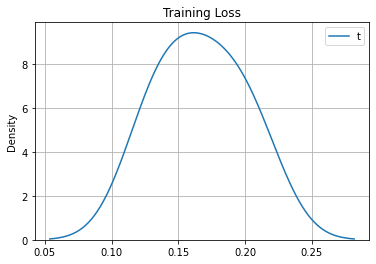

In [192]:
loss_range=np.log(history.losses)
sns.distplot(history.losses, hist=False)
plt.title('Training Loss')
plt.grid()
plt.legend('top')
plt.show()

In [193]:
val_preds = lstm_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for LSTM Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for LSTM Based Model on Test Data: "+str(v_rmse))

38/38 [==============================] - 1s 10ms/step
 RMSLE error for LSTM Based Model on Test Data: 0.7424695062075312
 RMSE error for LSTM Based Model on Test Data: 29.73798388798762


In [194]:
# Predict the price.
preds = lstm_model.predict(X_test, batch_size=BATCH_SIZE)
preds = target_scaler.inverse_transform(preds)
preds = np.exp(preds)-1
dtest["predicted_price"] = preds
dtest.head()

1/1 [==============================] - 0s 160ms/step


,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description,seq_description,target,predicted_price
4217,Push Up Bra by Bluebella,us topshop,Lingerie,"pink push up bra by bluebella. 89% polyamide,1...",bras,52.0,35.0,32.69,pink push bra bluebella 89 polyamide 11 ela...,"[362, 193, 11, 904, 151, 85, 154, 9, 16, 4]",-0.095721,43.056477
1362,Aerie Seamless Thong,aerie,Everyday Loves Undies 7 for $27.50 USD,total cheek! smooth: no seams. all comfort. re...,panties,12.5,12.5,0.00,total cheek smooth no seams comfort real c...,"[64, 17, 53, 36, 263, 57, 8, 13, 3, 497, 532, ...",-0.706620,41.301025
4303,Retro Vikini 9K2124,hanky panky,Women - Lingerie & Shapewear - Panties,you can't go wrong with hanky panky's signatur...,panties,36.0,36.0,0.00,can t go wrong hanky panky s signature fit fe...,"[133, 52, 49, 371, 73, 75, 83, 108, 21, 129, 5...",-0.256251,47.086437
4594,Signature High-Waist Lace Betty Brief 482222,hanky panky,Women - Lingerie & Shapewear - Designer Lingerie,gorgeous allover lace and a cut that sits high...,panties,34.0,34.0,0.00,gorgeous allover lace cut sits higher waist gi...,"[252, 477, 2, 200, 1803, 396, 132, 484, 232, 7...",-0.281074,45.047787
4749,Signature Lace Vikini,hanky panky,Women's Panties,double up on the flattering fit of a v-front b...,panties,60.0,60.0,0.00,double flattering fit v front bikini soft sign...,"[510, 219, 21, 68, 27, 141, 14, 108, 32, 2, 40...",-0.032923,43.081295


## CNN Based MODEL

In [195]:
def cnn_model(lr=0.001, decay=0.0):

    # Inputs
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")

    # Embeddings layers
    emb_item_desc = Embedding(MAX_TEXT, 50)(item_desc)
#     emb_item_desc = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=True)(item_desc)

    convs1 = []
    
    for filter_length in [1,2,3]:
        cnn_layer1 = Conv1D(filters=50, kernel_size=filter_length, padding='same', activation='relu', strides=1) (emb_item_desc)
        
        maxpool1 = GlobalMaxPooling1D() (cnn_layer1)
        
        convs1.append(maxpool1)

    convs1 = concatenate(convs1)
    
    # main layers
    main_l = concatenate([
        convs1
    ])

    main_l = Dense(256)(main_l)
    main_l = Activation('elu')(main_l)

    main_l = Dense(128)(main_l)
    main_l = Activation('elu')(main_l)

    main_l = Dense(64)(main_l)
    main_l = Activation('elu')(main_l)

    # the output layer.
    output = Dense(1, activation="linear") (main_l)

    model = Model([item_desc], output)

#     optimizer = Adam(lr=lr, decay=decay)
#     model.compile(loss="mse", optimizer=optimizer)
    model.compile(loss="mse", optimizer="adam", metrics=["mae", rmsle_cust])

    return model

cnn = cnn_model()
cnn.summary()

Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 item_desc (InputLayer)         [(None, 75)]         0           []                               
                                                                                                  
 embedding_44 (Embedding)       (None, 75, 50)       166250      ['item_desc[0][0]']              
                                                                                                  
 conv1d_36 (Conv1D)             (None, 75, 50)       2550        ['embedding_44[0][0]']           
                                                                                                  
 conv1d_37 (Conv1D)             (None, 75, 50)       5050        ['embedding_44[0][0]']           
                                                                                           

In [196]:
BATCH_SIZE = 1024
epochs = 5
# Calculate learning rate decay.
exp_decay = lambda init, fin, steps: (init/fin)**(1/(steps-1)) - 1
steps = int(dtrain.shape[0] / BATCH_SIZE) * epochs
lr_init, lr_fin = 0.007, 0.0005
lr_decay = exp_decay(lr_init, lr_fin, steps)

cnn_model = cnn_model(lr=lr_init, decay=lr_decay)
print("Fitting CNN model to training data...")
cnn_model.fit(
        X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE,
        validation_data=(X_test, dtest.target), verbose=2,
)

Fitting CNN model to training data...
Epoch 1/5
5/5 - 3s - loss: 0.1577 - mae: 0.3230 - rmsle_cust: 0.0288 - val_loss: 0.0607 - val_mae: 0.2072 - val_rmsle_cust: 0.0094 - 3s/epoch - 672ms/step
Epoch 2/5
5/5 - 3s - loss: 0.0677 - mae: 0.2111 - rmsle_cust: 0.0097 - val_loss: 0.0701 - val_mae: 0.2129 - val_rmsle_cust: 0.0094 - 3s/epoch - 530ms/step
Epoch 3/5
5/5 - 3s - loss: 0.0539 - mae: 0.1845 - rmsle_cust: 0.0097 - val_loss: 0.0429 - val_mae: 0.1647 - val_rmsle_cust: 0.0094 - 3s/epoch - 652ms/step
Epoch 4/5
5/5 - 3s - loss: 0.0434 - mae: 0.1670 - rmsle_cust: 0.0097 - val_loss: 0.0348 - val_mae: 0.1438 - val_rmsle_cust: 0.0094 - 3s/epoch - 532ms/step
Epoch 5/5
5/5 - 2s - loss: 0.0299 - mae: 0.1302 - rmsle_cust: 0.0097 - val_loss: 0.0315 - val_mae: 0.1379 - val_rmsle_cust: 0.0094 - 2s/epoch - 491ms/step


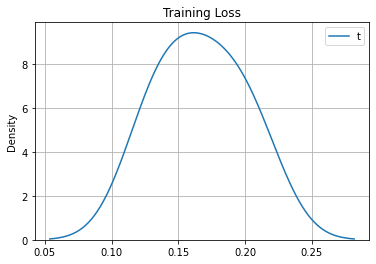

In [197]:
loss_range=np.log(history.losses)
sns.distplot(history.losses, hist=False)
plt.title('Training Loss')
plt.grid()
plt.legend('top')
plt.show()

In [198]:
val_preds = cnn_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print("RMSLE error for CNN Based Model on Test Data: "+str(v_rmsle))
print("RMSE error for CNN Based Model on Test Data: "+str(v_rmse))

38/38 [==============================] - 0s 5ms/step
RMSLE error for CNN Based Model on Test Data: 0.4279819759726953
RMSE error for CNN Based Model on Test Data: 23.777153296888425


In [199]:
# Predict the price.
preds = lstm_model.predict(X_test, batch_size=BATCH_SIZE)
preds = target_scaler.inverse_transform(preds)
preds = np.exp(preds)-1
dtest["predicted_price"] = preds
dtest.head()

2/2 [==============================] - 0s 30ms/step


,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description,seq_description,target,predicted_price
4217,Push Up Bra by Bluebella,us topshop,Lingerie,"pink push up bra by bluebella. 89% polyamide,1...",bras,52.0,35.0,32.69,pink push bra bluebella 89 polyamide 11 ela...,"[362, 193, 11, 904, 151, 85, 154, 9, 16, 4]",-0.095721,43.056477
1362,Aerie Seamless Thong,aerie,Everyday Loves Undies 7 for $27.50 USD,total cheek! smooth: no seams. all comfort. re...,panties,12.5,12.5,0.00,total cheek smooth no seams comfort real c...,"[64, 17, 53, 36, 263, 57, 8, 13, 3, 497, 532, ...",-0.706620,41.301025
4303,Retro Vikini 9K2124,hanky panky,Women - Lingerie & Shapewear - Panties,you can't go wrong with hanky panky's signatur...,panties,36.0,36.0,0.00,can t go wrong hanky panky s signature fit fe...,"[133, 52, 49, 371, 73, 75, 83, 108, 21, 129, 5...",-0.256251,47.086437
4594,Signature High-Waist Lace Betty Brief 482222,hanky panky,Women - Lingerie & Shapewear - Designer Lingerie,gorgeous allover lace and a cut that sits high...,panties,34.0,34.0,0.00,gorgeous allover lace cut sits higher waist gi...,"[252, 477, 2, 200, 1803, 396, 132, 484, 232, 7...",-0.281074,45.047787
4749,Signature Lace Vikini,hanky panky,Women's Panties,double up on the flattering fit of a v-front b...,panties,60.0,60.0,0.00,double flattering fit v front bikini soft sign...,"[510, 219, 21, 68, 27, 141, 14, 108, 32, 2, 40...",-0.032923,43.081295
